### [이코드는 여러가지의 상황을 추가하면서 각 기능에 대한 학습용임]
### 최종코드는 실습2의 실전모델제작 코드를 사용함

### [알아두기] 데이터셋이 폴더단위로 있을때는

- tf.keras.preprocessing.image_dataset_from_directory 를 이용하면 편리함.
- x데이터를 제작해줌
    - 폴더안의 이미지자료를 읽고(Image.open)
    - resize 한뒤
    - array로 변환하는
- y데이터를 제작해줌
    - 폴더이름을 a,b,c,d..의 오름차순으로 정렬해서 0,1,2,3..4의 숫자레이블로 준비함

- data_dir='c:\\data\\flower_photos\\'
![image.png](attachment:image.png)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from PIL import Image

### [참고: 데이터셋 살펴보기]


In [ ]:
data_dir='c:\\data\\flower_photos\\'
glob(data_dir + '\\*')


['c:\\data\\flower_photos\\daisy',
 'c:\\data\\flower_photos\\dandelion',
 'c:\\data\\flower_photos\\LICENSE.txt',
 'c:\\data\\flower_photos\\roses',
 'c:\\data\\flower_photos\\sunflowers',
 'c:\\data\\flower_photos\\tulips']

In [ ]:
# 작업폴더중에 폴더목록만 다시 모으기
dataList = [x for x in dataListAll if os.path.isdir(x)]
dataList

['c:\\data\\flower_photos\\daisy',
 'c:\\data\\flower_photos\\dandelion',
 'c:\\data\\flower_photos\\roses',
 'c:\\data\\flower_photos\\sunflowers',
 'c:\\data\\flower_photos\\tulips']

In [ ]:
#### 위의 dataList는 아래코드와 같지만 위의 컴프리헨션(압축기법)이 속도가 좀더 빠름
#### 구글검색 '컴프리헨션 속도'
dataList=[]
for x in dataListAll:
    if os.path.isdir(x):
        dataList.append(x)
dataList

['c:\\data\\flower_photos\\daisy',
 'c:\\data\\flower_photos\\dandelion',
 'c:\\data\\flower_photos\\roses',
 'c:\\data\\flower_photos\\sunflowers',
 'c:\\data\\flower_photos\\tulips']

c:\data\flower_photos\roses


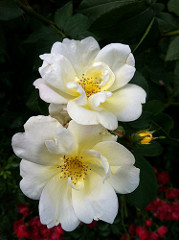

In [ ]:
# 한개이미지 파일만 살펴보기
print(dataList[2])
roses = glob(dataList[2] + '/*.jpg')
PIL.Image.open(str(roses[0]))

In [ ]:
### 폴더단위로 jpg 몇개씩 있는지 확인해보기
for x in dataList:
    print(x, '-->', len(glob(x+'/*.jpg')))

c:\data\flower_photos\daisy --> 633
c:\data\flower_photos\dandelion --> 898
c:\data\flower_photos\roses --> 641
c:\data\flower_photos\sunflowers --> 699
c:\data\flower_photos\tulips --> 799


--▶daisy


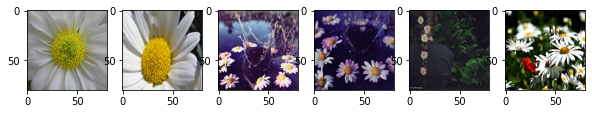

--▶dandelion


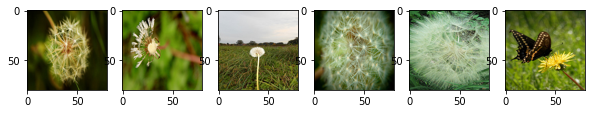

--▶roses


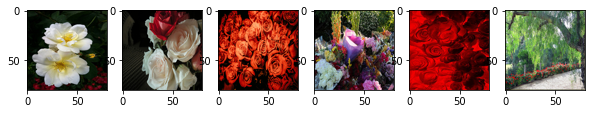

--▶sunflowers


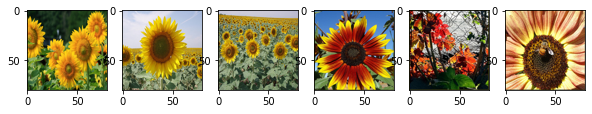

--▶tulips


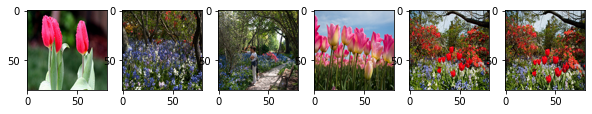

In [ ]:

cnt=0

for row,folder in enumerate(dataList):
    fileList=glob(folder + '\\*.jpg')
    folderName=folder.split('\\')[-1]
    print('--▶' + folderName)
    
    plt.figure(figsize=(10,30))
    
    for file in fileList[:6]:
                    
        img=Image.open(file)
        img=img.resize((80,80))
        
        cnt+=1
        plt.subplot(row+1,6,cnt)
        plt.imshow(img)
        
        
    plt.show()

### [작업2] 필수: keras.preprocessing을 사용하여 로드하기
- 폴더에서 지정한 배치사이즈만큼 데이터를 읽고, 이미지의 너비높이의 크기를 조정함
- 폴더에서 읽은자료를 train_ds 와 val_ds로 나누어서 보관(배치사이즈를 32개씩 지정했음)
- 전체자료 3670개에서 사용자가 0.8을 트레이닝으로지정했다면 2936개의 이미지와 레이블을 처리함
    - 이때 train_ds와 val_ds에는 x(이미지), y(레이블)이 같이 있음
    - train_ds[0]은 32개의 이미지와 레이블 : 누적개수 32
    - train_ds[1]은 32개의 이미지와 레이블 : 누적개수 64
    - train_ds[91]은 32개의 이미지와 레이블: 누적개수 2912
    - train_ds[92]은 24개의 이미지와 레이블: 누적개수 2936


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from PIL import Image

In [ ]:
# [참고,필수코드아님] 전체데이터갯수 확인
data_dir='c:\\data\\flower_photos\\*'
dataList=glob(data_dir)

hap=0
for x in dataList:
    fileCnt=len(glob(x + '\\*.jpg'))
    print('▶' + x.split('\\')[-1] ,': foler fileList cnt ==> ', fileCnt)
    hap=hap+fileCnt
print('total file Cnt==>',hap)


▶daisy : foler fileList cnt ==>  633
▶dandelion : foler fileList cnt ==>  898
▶LICENSE.txt : foler fileList cnt ==>  0
▶roses : foler fileList cnt ==>  641
▶sunflowers : foler fileList cnt ==>  699
▶tulips : foler fileList cnt ==>  799
total file Cnt==> 3670


In [ ]:
batch_size = 32   # 한셋트에 몇개의 자료를 넣을것인가? 기본 32로 많이하나 조정해도됨. 숫자를 적게할수록 처리속도가 느려짐
img_height = 180
img_width = 180

In [ ]:
data_dir='c:\\data\\flower_photos\\'
# 전체 3670개의 이미지자료에서 80%의 2936개를 트레이닝(훈련)자료로 세팅함
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,   # 3670*80%=2936, subset이 training여서 1-0.2임
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)     # 2936개의이미지를 32개씩 세트해서 묶음. 즉 92개세트가 나옴 (92세트*32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
# 전체 3670개의 이미지자료에서 20%의 734개를 테스트데이터로 세팅함
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
# train_ds에 할당된 data_dir 폴더명
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### [작업3] keras.preprocessing로드 데이터 살펴보기

In [ ]:
## 참고: 32개씩  92개의 세트가 있음을 의미,  총 2936개의 트레이닝 자료는 32개씩(배치사이즈단위) 모여있음
len(list(train_ds))

92

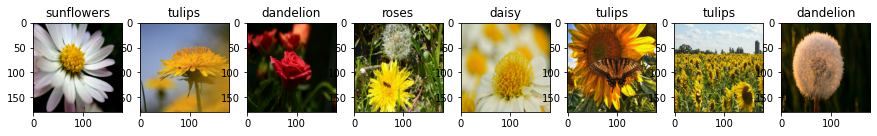

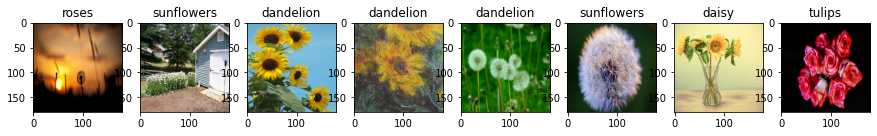

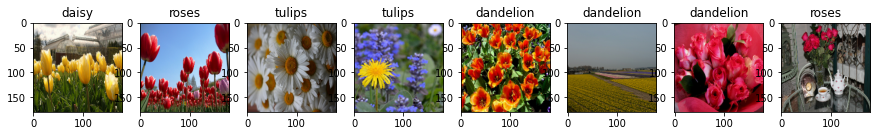

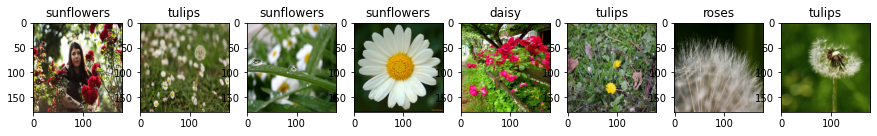

In [ ]:
## 참고, 출력보기
# list(train_ds)[0] 에는  
# 32개의 이미지 자료(list(train_ds)[0][1]) 와 
# y레이블 32개가 있음. (list(train_ds)[0][1]) 

ximg=list(train_ds)[0][0]     
yLabel=list(train_ds)[0][1]
ximg=np.array(ximg, dtype='uint8') 

cnt=0
for row in range(1,5):
    plt.figure(figsize=(15,30))

    for col in range(1,9):
        plt.subplot(row,8,cnt+1)
        plt.imshow(ximg[cnt])
        plt.title(class_names[yLabel[cnt]])
        cnt+=1

### [작업4] 인공지능 모델 살펴보기
- 위에서부터 작업한 코드중 필수코드만 모아서 작업
- 이 작업만 진행해도 됨

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from glob import glob
from PIL import Image

In [ ]:
data_dir='c:\\data\\flower_photos\\'

batch_size = 32   # 한셋트에 몇개의 자료를 넣을것인가? 기본 32로 많이하나 조정해도됨. 숫자를 적게할수록 처리속도가 느려짐
img_height = 180
img_width = 180


# 전체 3670개의 이미지자료에서 80%의 2936개를 트레이닝(훈련)자료로 세팅함
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,   # 3670*80%=2936, subset이 training여서 1-0.2임
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)     # 2936개의이미지를 32개씩 세트해서 묶음. 즉 92개세트가 나옴 (92세트*32)

# 전체 3670개의 이미지자료에서 20%의 734개를 테스트데이터로 세팅함
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# train_ds에 할당된 data_dir 폴더명
class_names = train_ds.class_names
print(class_names)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
num_classes = len(class_names)
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # y값이 원핫인코딩이 안되어 있어서임
              metrics=['accuracy'])


# 모델 최적화를 위한 설정 구간입니다.
MODEL_DIR = './model/'  # 폴더없어도 알아서 생성됨
modelpath="./model/flower_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss',       # val_loss값을 기준으로
                               verbose=1,                # 실행결과를 화면에 출력함. verbose=0하면 실행결과가 화면에 나타나지않음
                               save_best_only=True)  # 가장좋은(즉 loss숫자가 가장 낮은) 모델을 저장함

early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=5) # 실행하다가 5번이상 더 좋은 결과가 없으면 중단

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[early_stopping_callback,checkpointer]
)




Epoch 1/20
92/92 [==============================] - ETA: 0s - loss: 1.2491 - accuracy: 0.4785
Epoch 1: val_loss improved from inf to 1.16039, saving model to ./model\flower_CNN.hdf5
92/92 [==============================] - 32s 345ms/step - loss: 1.2491 - accuracy: 0.4785 - val_loss: 1.1604 - val_accuracy: 0.5668
Epoch 2/20
92/92 [==============================] - ETA: 0s - loss: 0.9528 - accuracy: 0.6376
Epoch 2: val_loss improved from 1.16039 to 1.07323, saving model to ./model\flower_CNN.hdf5
92/92 [==============================] - 32s 342ms/step - loss: 0.9528 - accuracy: 0.6376 - val_loss: 1.0732 - val_accuracy: 0.5586
Epoch 3/20
92/92 [==============================] - ETA: 0s - loss: 0.8385 - accuracy: 0.6785
Epoch 3: val_loss improved from 1.07323 to 0.93000, saving model to ./model\flower_CNN.hdf5
92/92 [==============================] - 32s 345ms/step - loss: 0.8385 - accuracy: 0.6785 - val_loss: 0.9300 - val_accuracy: 0.6431
Epoch 4/20
92/92 [==============================] 

#### history차트를 그렸을때 아래와같이 차트가 나왔을때 차트해석은요....
- 만약에 위와같이 checkpointer = ModelCheckpoint 를 넣지 않으면 잘나오든 못나오든 에포크 맨 마지막의 결과값(weights가 저장됨)
- 아래 이미지는 별도로 체크포인트를 저장하지 않았을때의 설명임

![image.png](attachment:image.png)

In [ ]:
# history라는변수에 모델이 할당되어 있으므로 그 history변수의 history를 살펴보면
# 딕셔너리 구조로 들어가 있음.

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

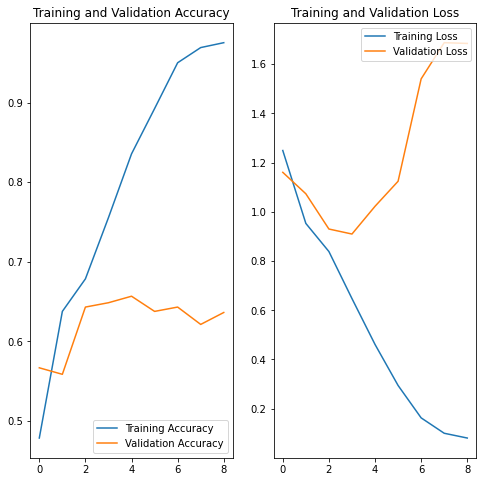

In [ ]:
## 차트작성함
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 과대적합(overfitting) 이란?
- w,b의 갱신은 훈련데이터에의 오차를 계산해서 이루어짐.
- 과대적합은 훈련데이터의 오차가 적어서 w,b의 갱신폭이 크지 않으면서 훈련데이터의 오차는 계속 작아지며
- 테스트데이터에 적용했을때 테스트데이터의 오차는 계속 늘어나는 현상을 의미함
- 과대적합해소방안
    -방법1) 트레이닝에 더많은 데이터를 넣어서(증강) 오차가 계속 생기게 하여 훈련을 계속 시키게 하면 됨
    -방법2) 에포크 훈련이 많을때 dropout을 넣어서 일정한 데이터를 0으로 만듦
    -방법3) 구글검색 '인공지능 과대적합 해소법'


![image.png](attachment:image.png)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

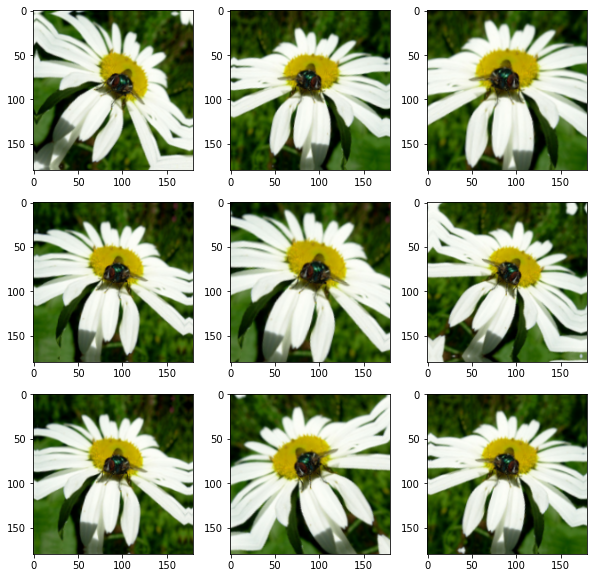

In [ ]:
# 32개의 데이터세트(train_ds[0]) 중 x데이터 32세트(train_ds[0][0]) 중 첫번째이미지(train_ds[0][0][0])

images=list(train_ds)[0][0][0]   
images=np.array(images)
plt.figure(figsize=(10, 10))
for x in range(9):
    augmentList=data_augmentation(images.reshape(1,180,180,3))
    plt.subplot(3,3,x+1)
    plt.imshow(augmentList[0].numpy().astype('uint8'))

    
    
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):       # train_ds.take(1)  은 32개의 이미지 첫세트임

#   for i in range(9):
#     augmented_images = data_augmentation(images)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_images[0].numpy().astype("uint8"))
#     plt.axis("off")

    



##### 증강은 tensorflow.keras.preprocessing에서 제공하는  ImageDataGenerator로 작업도 가능함
- from tensorflow.keras.preprocessing.image import ImageDataGenerator
![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
### 증강한 자료 넣고 모델 돌려보기

num_classes = len(class_names)
model = Sequential([
  data_augmentation,          ###########################>  이 구역이 추가된것임
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),              ######################################> 추가
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # y값이 원핫인코딩이 안되어 있어서임
              metrics=['accuracy'])


# 모델 최적화를 위한 설정 구간입니다.
MODEL_DIR = './model/'  # 폴더없어도 알아서 생성됨
modelpath="./model/flower_CNN_증강_basic_dropoutx.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss',       # val_loss값을 기준으로
                               verbose=1,                # 실행결과를 화면에 출력함. verbose=0하면 실행결과가 화면에 나타나지않음
                               save_best_only=True)  # 가장좋은(즉 loss숫자가 가장 낮은) 모델을 저장함

early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=5) # 실행하다가 5번이상 더 좋은 결과가 없으면 중단

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[early_stopping_callback,checkpointer]
)





Epoch 1/20
92/92 [==============================] - ETA: 0s - loss: 1.5322 - accuracy: 0.3839
Epoch 1: val_loss improved from inf to 1.10911, saving model to ./model\flower_CNN_증강_basic_dropoutx.hdf5
92/92 [==============================] - 69s 733ms/step - loss: 1.5322 - accuracy: 0.3839 - val_loss: 1.1091 - val_accuracy: 0.5640
Epoch 2/20
92/92 [==============================] - ETA: 0s - loss: 1.1039 - accuracy: 0.5518
Epoch 2: val_loss improved from 1.10911 to 1.05483, saving model to ./model\flower_CNN_증강_basic_dropoutx.hdf5
92/92 [==============================] - 68s 732ms/step - loss: 1.1039 - accuracy: 0.5518 - val_loss: 1.0548 - val_accuracy: 0.5640
Epoch 3/20
92/92 [==============================] - ETA: 0s - loss: 0.9920 - accuracy: 0.6097
Epoch 3: val_loss improved from 1.05483 to 0.93393, saving model to ./model\flower_CNN_증강_basic_dropoutx.hdf5
92/92 [==============================] - 67s 723ms/step - loss: 0.9920 - accuracy: 0.6097 - val_loss: 0.9339 - val_accuracy: 0.6

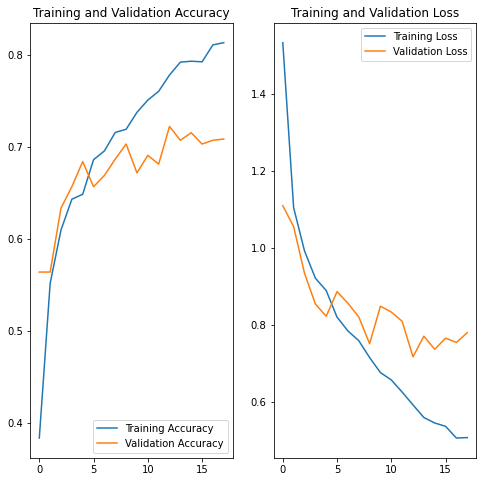

In [ ]:
## 차트작성함
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


#### 모델 레이어 보기 및 도식화


In [ ]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)